In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = r"/content/R.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels = 3)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [256, 256])
image = tf.expand_dims(image, axis = 0)

In [4]:
sobel_x = tf.constant([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype = tf.float32)
sobel_y = tf.constant([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]], dtype = tf.float32)

In [7]:
gray_image = tf.image.rgb_to_grayscale(image)

In [9]:
gx = tf.nn.conv2d(gray_image, tf.expand_dims(tf.expand_dims(sobel_x, axis = -1), axis = -1), strides = [1, 1, 1, 1], padding = 'SAME')
gy = tf.nn.conv2d(gray_image, tf.expand_dims(tf.expand_dims(sobel_y, axis = -1), axis = -1), strides = [1, 1, 1, 1], padding = 'SAME')

In [10]:
gradient_magnitude = tf.sqrt(tf.square(gx) + tf.square(gy))

In [11]:
gradient_magnitude /= tf.reduce_max(gradient_magnitude)

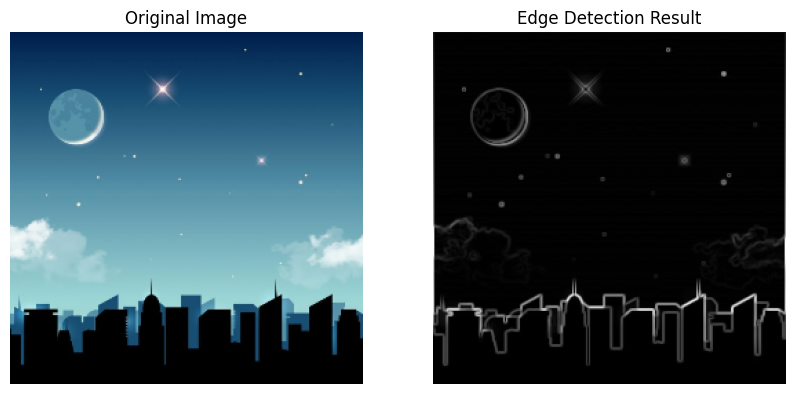

<tf.Tensor: shape=(1, 256, 256, 1), dtype=float32, numpy=
array([[[[0.1127958 ],
         [0.10811087],
         [0.10811087],
         ...,
         [0.10811087],
         [0.10811087],
         [0.1127958 ]],

        [[0.10765973],
         [0.00818083],
         [0.00818083],
         ...,
         [0.00818083],
         [0.00818083],
         [0.10765973]],

        [[0.11138971],
         [0.00695079],
         [0.00747639],
         ...,
         [0.00984249],
         [0.00984249],
         [0.11223361]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]]], dty

In [15]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detection Result')
plt.imshow(tf.squeeze(gradient_magnitude), cmap = 'gray')
plt.axis('off')

plt.show()
gradient_magnitude

In [16]:
gradients = tf.image.sobel_edges(image)

In [17]:
gradient_x = gradients[...,0]
gradient_y = gradients[...,1]

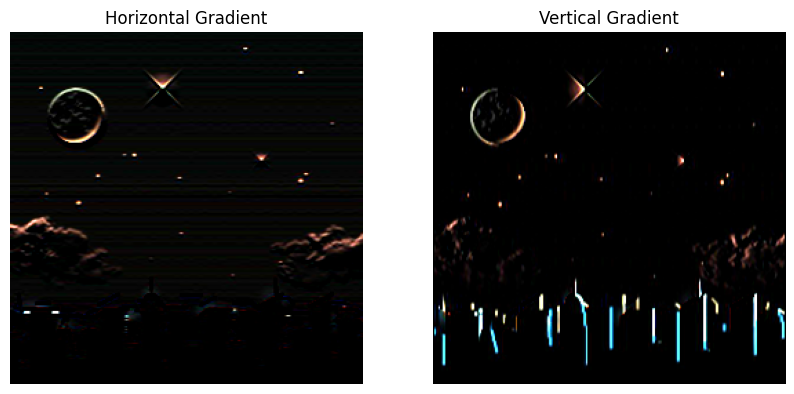

In [18]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.title('Horizontal Gradient')
plt.imshow(tf.squeeze(gradient_x), cmap = 'gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Vertical Gradient')
plt.imshow(tf.squeeze(gradient_y), cmap = 'gray')
plt.axis('off')

plt.show()